In [182]:
from useful_scit.imps import *

In [183]:
import sara_cluster.util as scu
from sara_cluster.util import *
import useful_scit.plot.plot as ucp

In [184]:
data_path = '../data/raw/Original_eq.20_2.nc'

In [185]:
ds = xr.open_dataset(data_path)

In [186]:
hyam     = 'hyam'
hybm     = 'hybm'
hyai     = 'hyai'
hybi     = 'hybi'
date     = 'date'
gw       = 'gw'
LANDFRAC = 'LANDFRAC'
NCONC01  = 'NCONC01'
PS       = 'PS'
lat_wg   = 'lat_wg'
NMR01    = 'NMR01'
COAGNUCL = 'COAGNUCL'
H2SO4    = 'H2SO4'
SOA_LV   = 'SOA_LV'

cols = [
    NCONC01  ,
    NMR01    ,
    H2SO4    ,
    COAGNUCL ,
    SOA_LV   ,
]

time ='time'
lev  ='lev'
lat  ='lat'
lon  ='lon'

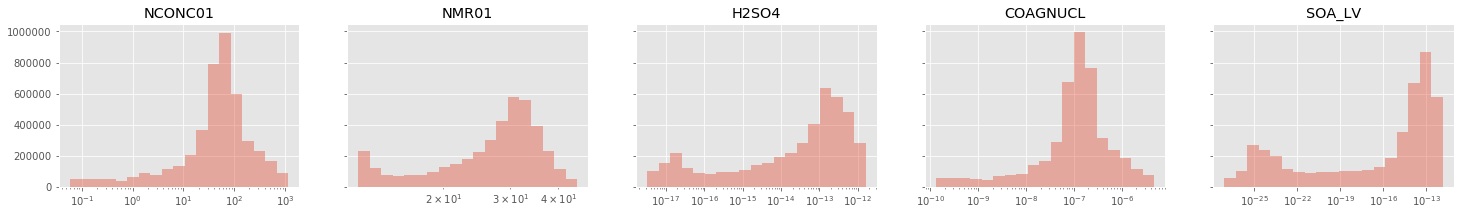

In [187]:
hist_better_mult(ds,cols)

In [188]:
df = ds[cols].to_dataframe()

In [189]:
dfr = df.reset_index([lat,lev,lon])

In [190]:
from sklearn.preprocessing import QuantileTransformer

In [191]:
qts = {}
df1 = df.copy()
for c in cols:
    qt = QuantileTransformer()
    data = qt.fit_transform(df[c].values.reshape(-1,1))
    df1[c]=data.flatten()
    qts[c]= qt

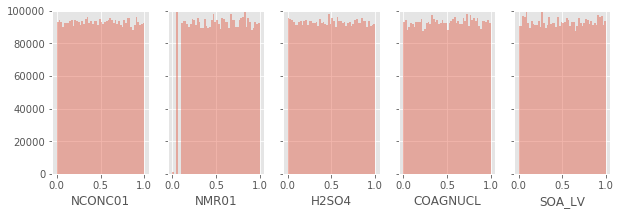

In [192]:
lenc = len(cols)
fig,axs = plt.subplots(1,lenc,figsize=[2*lenc,3],sharey=True)
axsf = axs.flatten()
for c,a in zip(cols,axsf):
    sns.distplot(df1[c].dropna(),ax=a,kde=False)
    a.set_ylim(0,1e5)

In [193]:
from sklearn.cluster import KMeans

In [194]:
c2 = cols
n_c = 10
kmean = KMeans(n_clusters=n_c, random_state=0)

In [195]:
from random import sample 

In [196]:
df2 = _df = df1[c2].dropna().copy()

In [197]:
sam = sample(range(len(_df)),int(len(_df)/10))
dfs = _df.iloc[sam].copy()

kmean.fit(dfs.values)

labs = kmean.predict(df2)

In [198]:
la = 'labs'
df2[la] = labs

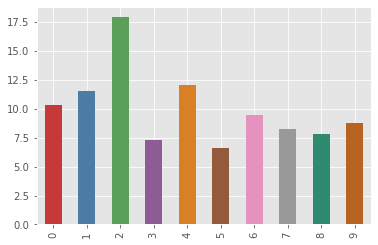

In [201]:
_df = df2[la].value_counts().sort_index()
_df = _df/_df.sum()*100
_df.plot.bar(color=ucp.cc);

In [17]:
_df = df2.reset_index(drop=True)
_df[la]=_df[la].astype(str)

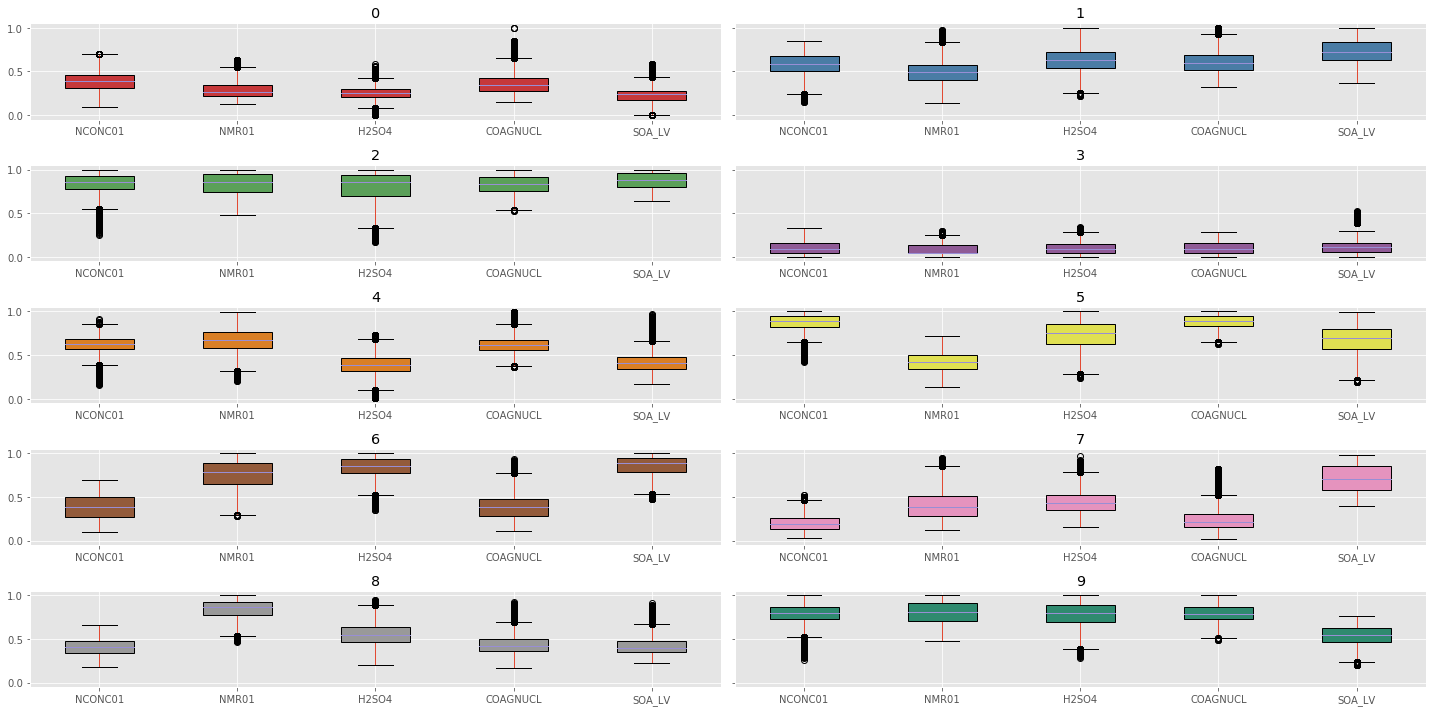

In [18]:
res = _df.groupby(la).boxplot(layout=(5,2),figsize=(20,10),return_type='both',patch_artist = True,);
plt.gcf().tight_layout()
_i = 0
for row_key, (ax,row) in res.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(ucp.cc[_i])
        box.set_edgecolor('k')
    _i +=1

In [19]:
ds2 = df2.to_xarray() 

In [20]:
_la = ds2[la].astype(int)
bb = (_la<=n_c) & (_la>=0)

In [21]:
ds2[la]=_la.where(bb).astype('int32')

In [22]:
tot100 = df2[la].count()/100

In [23]:
mkrs = mpl.lines.Line2D.filled_markers

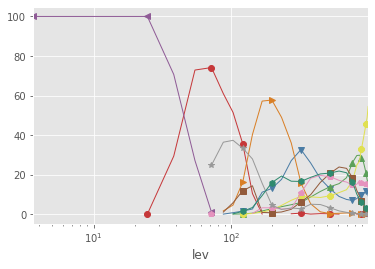

In [24]:
_df = df2.reset_index()[[lev,la,cols[0]]]
_d1 =_df
_d2 = _d1.groupby([lev,la]).count()
_d2 = _d2.unstack(la)[cols[0]].T/_d2.unstack(la).sum(axis=1) * 100
_d3 = _d2.T
_d3 = _d3.sort_index()
# ax = _d3.plot.area(color = ucp.cc,legend=False)
ax = _d3.plot.line(color = ucp.cc,legend=False,linewidth=1)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(3)
ax.set_xscale('log')

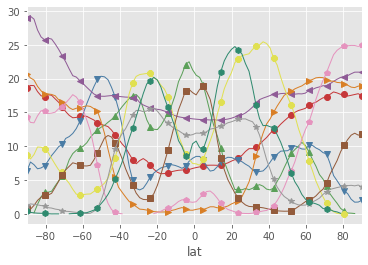

In [25]:
_df = df2.reset_index()[[lat,la,cols[0]]]
_d1 =_df
_d2 = _d1.groupby([lat,la]).count()
_d2 = _d2.unstack(la)[cols[0]].T/_d2.unstack(la).sum(axis=1) * 100
_d3 = _d2.T
_d3 = _d3.sort_index()
# ax = _d3.plot.area(color = ucp.cc,legend=False)
ax = _d3.plot.line(color = ucp.cc,legend=False,linewidth=1)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(5)

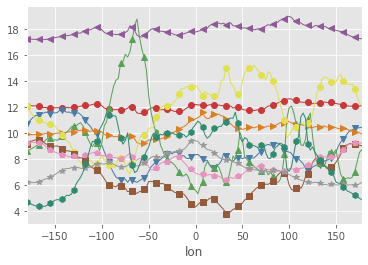

In [26]:
_df = df2.reset_index()[[lon,la,cols[0]]]
_d1 =_df
_d2 = _d1.groupby([lon,la]).count()
_d2 = _d2.unstack(la)[cols[0]].T/_d2.unstack(la).sum(axis=1) * 100
_d3 = _d2.T
_d3 = _d3.sort_index()
ax = _d3.plot.line(color = ucp.cc,legend=False,linewidth=1,marker='d')
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(5)

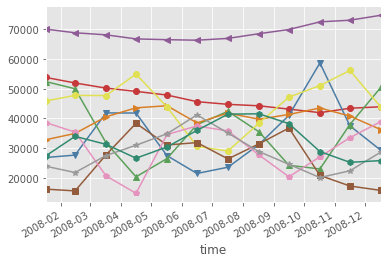

In [28]:
_df = df2.reset_index()[[time,la,cols[0]]]
_df1 = _df.groupby([la,time]).count()[cols[0]].unstack(la)

ax=_df1.plot.line(color=ucp.cc,legend=False)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(1)

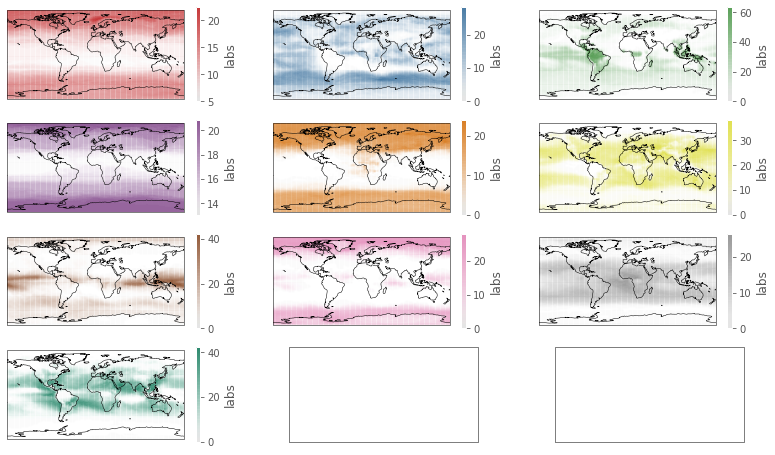

In [29]:
import cartopy.crs as ccrs
fig,axs = plt.subplots(4,3,subplot_kw={'projection':ccrs.PlateCarree()},figsize=np.array([4.5*3,2*4]))
axf = axs.flatten()
for il in range(n_c):
    col = ucp.cc[il]
    _ds = ds2.where(ds2[la]==il)
    cm = ucp.create_cmap_from_color(col)
#     fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(4.5,2))
    ax = axf[il]
    _ds1=_ds[la].count([lev,time])/ds2[la].count([lev,time])*100
    _ds1.plot(ax=ax, transform=ccrs.PlateCarree(),cmap=cm)
    ax.set_global(); ax.coastlines();

In [93]:
df3 = df2.copy()
for c in cols:
    _q = qts[c]
    df3[c] = np.log10(
        _q.inverse_transform(df2[c].values.reshape(-1,1)).flatten()
    )

In [112]:
l=2
ln = 'c'+str(l)
_df = df3[df3[la]==l][cols]

In [113]:
_df1 = _df[::].reset_index(drop=True)

In [116]:
l1 = 'level_1'
_df2 = _df1.stack().reset_index()[[l1,0]]
_df2.rename(columns={0:ln},inplace=True)

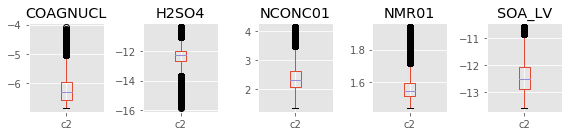

In [118]:
_df2.groupby(l1).boxplot(column=ln,sharey=False,layout=(1,5),figsize=(8,2));
plt.gcf().tight_layout()

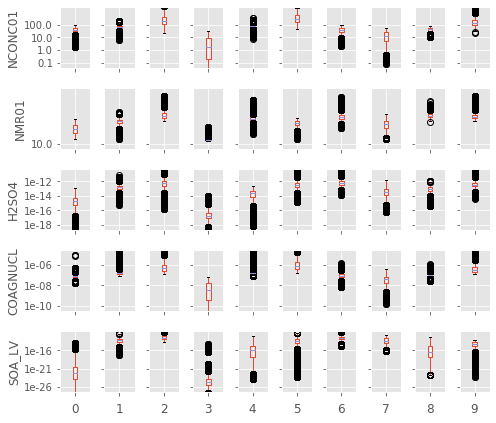

In [181]:
f,axs = plt.subplots(len(cols),n_c,figsize=(7,6))
for ic in range(len(cols)):
    for il in range(n_c):
        ax = axs[ic,il]
        c = cols[ic]

        _df = df3[df3[la]==il][[c]]
        q1,q2 = df3[c].quantile([.05,.95])
        q1 = np.floor(q1)
        q2 = np.ceil(q2)
        lq = q2-q1
        qi = int(round(lq/3))
        if qi==0: qi=1

        ax = _df.boxplot(ax=ax)
        _ar = np.arange(q1, q2, qi)
        ax.set_yticks(_ar)
        ax.set_yticklabels(10.0**_ar);
        ax.set_ylim(q1-lq/10,q2+lq/10)
        ax.set_xticklabels([None])
        if ic+1!=len(cols):
            ax.set_xlabel(None)
        else:
            ax.set_xlabel(il)
        if il ==0:
            ax.set_ylabel(c)
        else:
            ax.set_yticklabels(len(_ar)*[None])
f.tight_layout()